In [ ]:
!ln -s /content/drive/My\ Drive/Analytics_vidhya/Face_count /mydrive
!ls /mydrive

 backup		  obj.data      sample_submission_fChOj3V.csv
 bbox_train.csv   obj.names     test.csv
 Face		  result1.txt   train.csv
 image_data	  result2.txt  'train_HNzkrPW (1).zip'
 Image_df	  result3.txt   yolov3_custom2.cfg
 Non_Face	  result4.txt
 obj		  result.txt


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/mydrive/train.csv')
train.head()

,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4


In [ ]:
!ls /mydrive/image_data | tail -10

18198.jpg
18199.jpg
18200.jpg
18201.jpg
18202.jpg
18203.jpg
18204.jpg
18205.jpg
18206.jpg
18207.jpg


In [ ]:
bbox_train = pd.read_csv('/mydrive/bbox_train.csv')
bbox_train.head()

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202


In [ ]:
len(train)

5733

In [ ]:
len(bbox_train.Name.unique())

5733

In [ ]:
bbox_train['bx_center'] = (((bbox_train['xmax']+bbox_train['xmin'])/2))/bbox_train['width']
bbox_train['by_center'] = (((bbox_train['ymax']+bbox_train['ymin'])/2))/bbox_train['height']
bbox_train['b_width'] = (bbox_train['xmax']-bbox_train['xmin'])/bbox_train['width']
bbox_train['b_height'] = (bbox_train['ymax']-bbox_train['ymin'])/bbox_train['height']

In [ ]:
bbox_train

,Name,width,height,xmin,ymin,xmax,ymax,bx_center,by_center,b_width,b_height
0,10001.jpg,612,408,192,199,230,235,0.344771,0.531863,0.062092,0.088235
1,10001.jpg,612,408,247,168,291,211,0.439542,0.464461,0.071895,0.105392
2,10001.jpg,612,408,321,176,366,222,0.561275,0.487745,0.073529,0.112745
3,10001.jpg,612,408,355,183,387,214,0.606209,0.486520,0.052288,0.075980
4,10002.jpg,612,408,339,165,378,202,0.585784,0.449755,0.063725,0.090686
...,...,...,...,...,...,...,...,...,...,...,...
24528,18205.jpg,612,425,9,52,52,116,0.049837,0.197647,0.070261,0.150588
24529,18207.jpg,475,612,160,149,241,226,0.422105,0.306373,0.170526,0.125817
24530,18207.jpg,475,612,226,47,277,104,0.529474,0.123366,0.107368,0.093137
24531,18207.jpg,475,612,113,41,179,106,0.307368,0.120098,0.138947,0.106209


In [ ]:
'''import shutil

def copy_function(name):
  try:
    shutil.copyfile('/mydrive/image_data/'+name, '/mydrive/obj/'+name)
    print(name+' copied successfully')
  except:
    print(name+ 'error while copying')


for name in train['Name']:
  df = bbox_train[bbox_train['Name']==name]
  copy_function(name)
  name = name[0:-3]+'txt'
  i = len(df)
  for bx_center,by_center,b_width,b_height in zip(df['bx_center'],
                                                  df['by_center'],
                                                  df['b_width'],
                                                  df['b_height']):
    f = open('/mydrive/obj/'+name, 'a')
    if(i>1):
      f.write('0 '+str(bx_center)+' '+str(by_center)+' '+str(b_width)+' '+str(b_height)+'\n')
    else:
      f.write('0 '+str(bx_center)+' '+str(by_center)+' '+str(b_width)+' '+str(b_height)
    i-=1
    f.close()'''

"import shutil\n\ndef copy_function(name):\n  try:\n    shutil.copyfile('/mydrive/image_data/'+name, '/mydrive/obj/'+name)\n    print(name+' copied successfully')\n  except:\n    print(name+ 'error while copying')\n\n\nfor name in train['Name']:\n  df = bbox_train[bbox_train['Name']==name]\n  copy_function(name)\n  name = name[0:-3]+'txt'\n  i = len(df)\n  for bx_center,by_center,b_width,b_height in zip(df['bx_center'],\n                                                  df['by_center'],\n                                                  df['b_width'],\n                                                  df['b_height']):\n    f = open('/mydrive/obj/'+name, 'a')\n    if(i>1):\n      f.write('0 '+str(bx_center)+' '+str(by_center)+' '+str(b_width)+' '+str(b_height)+'\n')\n    else:\n      f.write('0 '+str(bx_center)+' '+str(by_center)+' '+str(b_width)+' '+str(b_height)\n    i-=1\n    f.close()"

In [ ]:
files = train['Name'].tolist() 

train_files = files[0:len(files)-1000]
valid_files = files[len(files)-1000 :]

In [ ]:
len(train_files)

4733

In [ ]:
len(valid_files)

1000

In [ ]:
for i in train_files:
  f = open('train.txt','a')
  f.write('/mydrive/obj/'+i+'\n')
  f.close()

In [ ]:
for i in valid_files:
  f = open('valid.txt','a')
  f.write('/mydrive/obj/'+i+'\n')
  f.close()

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13057, done.
remote: Total 13057 (delta 0), reused 0 (delta 0), pack-reused 13057
Receiving objects: 100% (13057/13057), 11.76 MiB | 10.02 MiB/s, done.
Resolving deltas: 100% (8922/8922), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

In [ ]:
!cp /mydrive/obj.names ./data
!cp /mydrive/obj.data ./data

In [ ]:
!cp /mydrive/yolov3_custom2.cfg ./cfg

In [ ]:
!mv /content/train.txt ./data
!mv /content/valid.txt ./data

In [ ]:
!cp /content/drive/My\ Drive/Yolo_v3/Project_1/darknet53.conv.74 ./

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg /mydrive/backup/yolov3_custom2_last.weights -dont_show

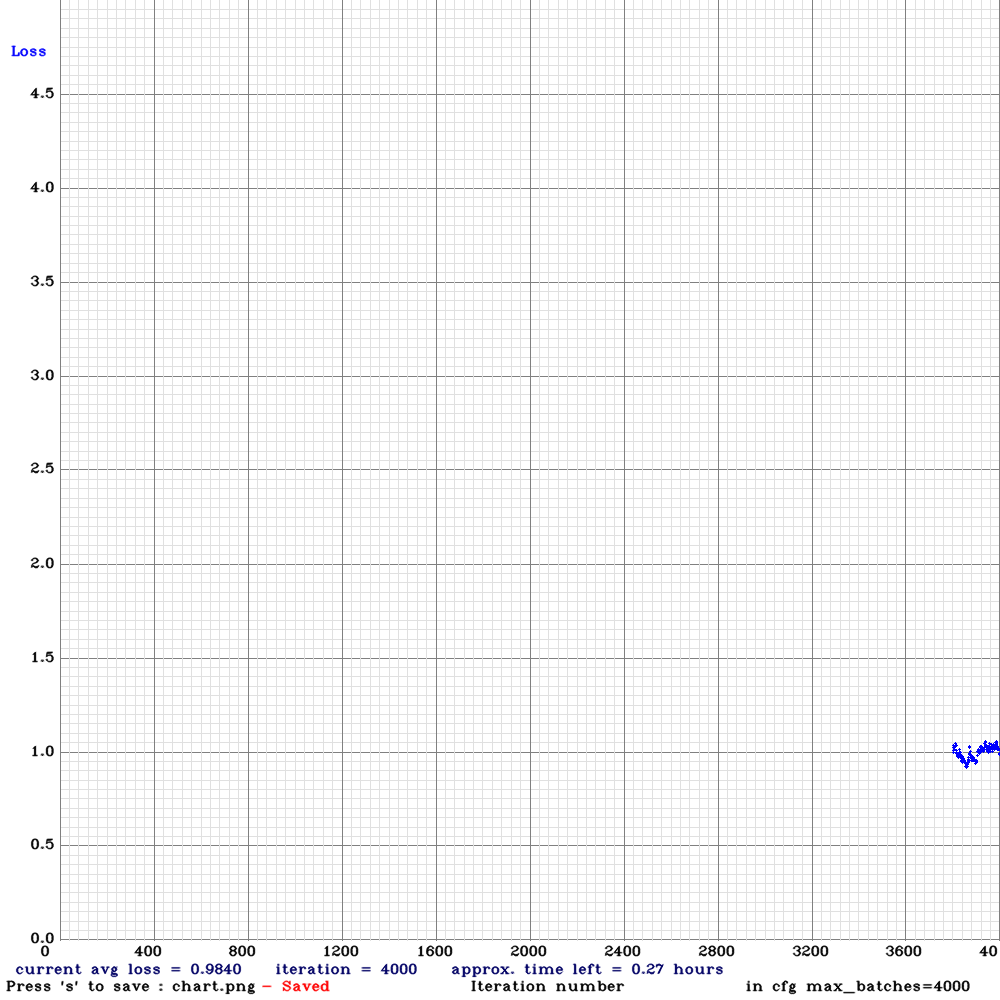

In [ ]:
'''from PIL import Image

img = Image.open('chart.png')
img'''

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom2.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
test = pd.read_csv('/mydrive/test.csv')
test.head(10)

,Name
0,10005.jpg
1,10009.jpg
2,10015.jpg
3,10022.jpg
4,10023.jpg
5,10024.jpg
6,10025.jpg
7,10029.jpg
8,10030.jpg
9,10033.jpg


In [ ]:
len(test)

2463

In [ ]:
for i in test.Name.tolist():
  f = open('test.txt','a')
  f.write('/mydrive/image_data/'+i+'\n')
  f.close()

In [ ]:
!mv /content/darknet/test.txt ./data

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/backup/yolov3_custom2_final.weights  /mydrive/image_data/10619.jpg  res.txt

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

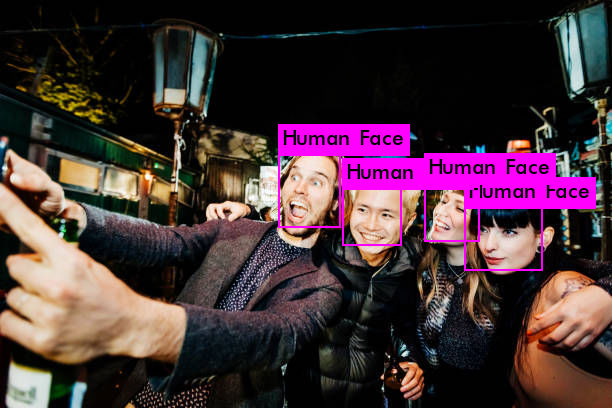

In [ ]:
from PIL import Image
img = Image.open('predictions.jpg')
img

In [ ]:
#img.size

(612, 408)

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/backup/yolov3_custom2_final.weights -dont_show < ./data/test.txt > result4.txt  

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128 

In [ ]:
!cp /content/darknet/result4.txt /mydrive